In [1]:
#Importing data into python 

import pandas as pd
df = pd.DataFrame.from_csv('data/Salesdata.txt', sep = '\t')
df.head()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Price,Sales
Observ.,,
1,54,93
2,54,92
3,53,92
4,54,91
5,52,93


In [6]:
#Running regressions with statsmodel packege

import statsmodels.formula.api as smf
form = 'Sales~Price'
results = smf.ols(formula = form, data = df).fit()
a= results.params[0]
b = results.params[1]
print(a,b)
print(results.summary())

186.5071428571428 -1.7503105590062118
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     268.3
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           2.55e-30
Time:                        01:26:35   Log-Likelihood:                -164.58
No. Observations:                 104   AIC:                             333.2
Df Residuals:                     102   BIC:                             338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1

In [14]:
#Creating Residuals column in dataframe

df['errors']= (df['Sales']-a-b*df['Price'])
df.head()

,Price,Sales,errors
Observ.,,,
1,54,93,1.009627
2,54,92,0.009627
3,53,92,-1.740683
4,54,91,-0.990373
5,52,93,-2.490994


Text(0, 0.5, 'frequency')

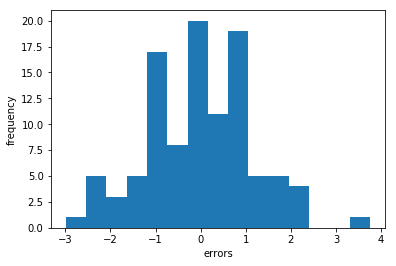

In [33]:
#Plotting histogram of residuals

import matplotlib.pyplot as plt
df['errors'].plot(kind = 'Hist', bins = 15)
plt.xlabel('errors')
plt.ylabel('frequency')

In [44]:
#Calculating standard deviation of residuals

s = ((((df['errors']-df['errors'].mean())**2).sum())/(df['errors'].count()-1))**(1/2)
print(s)

#OR we can directly calculate it by the following method

print(df['errors'].std())

1.1833815816032216
1.1833815816032212


In [59]:
# If our turnover formula is T = Sales X Price where Sales = a + b x Price so T = aP + bP2 and hence our optimal Price will be P = -a/2b (according to the condition of maxima) hence,
P = -a/(2*b)      # P = Optimal Price
PS = a + b*P
print('For the optimal price of {}, our predicted sales are {}'.format(P,PS))

For the optimal price of 53.27830021291693, our predicted sales are 93.2535714285714


In [70]:
#Since S = a + bP + E and P = -a/2b (accroding to the condition of maxima) so by putting the value of P in S we get S = a/2 + E

#Here Standard error of a is
SEa = results.bse[0]

#95% confidence interval for a = a+-2 x SE of a
a1 = a-2*SEa
a2 = a+2*SEa
print('a1= {}, a2 = {}'.format(a1,a2))

#95% confidence interval for Error term is E = +-2 x S.d of errors
e1 = -2*s
e2 = 2*s
print('e1 = {}, e2 = {}'.format(e1, e2))

#Hence optimal sales interval is 
S1 = a1/2 + e1
S2 = a2/2 + e2
print('\n\nOptimal sales are:\nLower bound = {}\nUpper bound = {}'.format(S1,S2))


a1= 174.97247282881273, a2 = 198.0418128854729
e1 = -2.366763163206443, e2 = 2.366763163206443


Optimal sales are:
Lower bound = 85.11947325119992
Upper bound = 101.38766960594289
